In [20]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (5, 5)
from run_assessment import modeller_score, developer_score
import cPickle
import itertools 
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [39]:
def load_pickle(filename):
    with open(filename, 'r') as fin:
        ret = cPickle.load(fin)
    return ret

def compute_score(ground_truth, alignment, metric):
    if alignment is None:
        return None
    keys = ground_truth.keys()
    scores = []
    for id_a, id_b in itertools.permutations(keys, 2):
        struct_align = [ground_truth[id_a], ground_truth[id_b]]
        seq_align = [alignment[id_a], alignment[id_b]]
        try:
            scores.append(metric(struct_align, seq_align))
        except ZeroDivisionError:
            return None
    return np.mean(scores)

def compute_score_batch(ground_truths, alignments, metric):
    scores = [compute_score(g, a, metric) for g, a in zip(ground_truths, alignments)]
    return scores

In [40]:
pasta = load_pickle('../result/pasta.pickle')
mafft = load_pickle('../result/mafft.pickle')
# baliphy = load_pickle('../result/baliphy.pickle')
baliphy = load_pickle('../result/baliphy_50000.pickle')
ground_truth = load_pickle('../result/ground_truth.pickle')
combined = lambda x, y: (modeller_score(x, y) + developer_score(x, y))/2

In [41]:
pasta_scores = compute_score_batch(ground_truth, pasta, developer_score)

In [42]:
baliphy_scores = compute_score_batch(ground_truth, baliphy, developer_score)

In [43]:
mafft_scores = compute_score_batch(ground_truth, mafft, developer_score)

In [44]:
mask = []
for a, b, c in zip(pasta_scores, baliphy_scores, mafft_scores):
    mask.append(a is not None and b is not None and c is not None)

In [45]:
pasta_scores = [y for x, y in zip(mask, pasta_scores) if x]
baliphy_scores = [y for x, y in zip(mask, baliphy_scores) if x]
mafft_scores = [y for x, y in zip(mask, mafft_scores) if x]

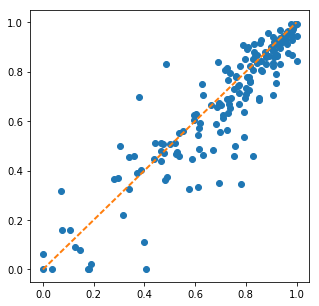

In [46]:
plt.plot(pasta_scores, baliphy_scores, 'o')
plt.plot([0, 1], [0, 1], '--',linewidth=2.0)

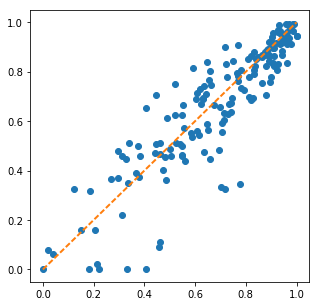

In [47]:
plt.plot(mafft_scores, baliphy_scores, 'o')
plt.plot([0, 1], [0, 1], '--',linewidth=2.0)

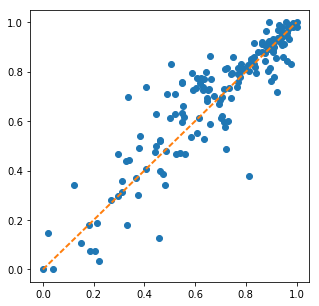

In [48]:
plt.plot(mafft_scores, pasta_scores, 'o')
plt.plot([0, 1], [0, 1], '--',linewidth=2.0)

In [49]:
print(np.mean(baliphy_scores))
print(np.mean(mafft_scores))
print(np.mean(pasta_scores))

0.676762599915
0.694696226659
0.711679452482


In [50]:
print(np.median(baliphy_scores))
print(np.median(mafft_scores))
print(np.median(pasta_scores))

0.741071428571
0.74
0.778947368421


In [51]:
print(scipy.stats.pearsonr(baliphy_scores, mafft_scores))
print(scipy.stats.pearsonr(baliphy_scores, pasta_scores))
print(scipy.stats.pearsonr(mafft_scores, pasta_scores))

(0.89084708638958054, 4.1325977626627892e-59)
(0.90475115995306898, 8.5923703238414521e-64)
(0.90775170843844921, 6.7454782949427772e-65)


In [52]:
print(scipy.stats.ttest_rel(baliphy_scores, mafft_scores))
print(scipy.stats.ttest_rel(baliphy_scores, pasta_scores))
print(scipy.stats.ttest_rel(mafft_scores, pasta_scores))

Ttest_relResult(statistic=-1.9889048138766086, pvalue=0.04833519599617965)
Ttest_relResult(statistic=-4.1304264173393399, pvalue=5.6970236680008259e-05)
Ttest_relResult(statistic=-2.1158811209419506, pvalue=0.035828715358012853)


In [53]:
print(scipy.stats.ranksums(baliphy_scores, mafft_scores))
print(scipy.stats.ranksums(baliphy_scores, pasta_scores))
print(scipy.stats.ranksums(mafft_scores, pasta_scores))

RanksumsResult(statistic=-0.6095203259645201, pvalue=0.54217960420990663)
RanksumsResult(statistic=-1.3142260179015817, pvalue=0.18877015534442954)
RanksumsResult(statistic=-0.75202005513978698, pvalue=0.45203899830095795)


(array([  6.,   3.,   1.,   2.,   1.,   0.,   6.,   5.,   2.,  14.,   9.,
          7.,   7.,  13.,  10.,  10.,  17.,  18.,  19.,  19.]),
 array([ 0.        ,  0.04973118,  0.09946237,  0.14919355,  0.19892473,
         0.24865591,  0.2983871 ,  0.34811828,  0.39784946,  0.44758065,
         0.49731183,  0.54704301,  0.59677419,  0.64650538,  0.69623656,
         0.74596774,  0.79569892,  0.84543011,  0.89516129,  0.94489247,
         0.99462366]),
 <a list of 20 Patch objects>)

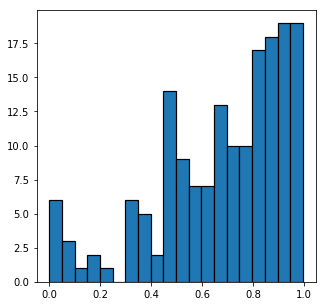

In [54]:
plt.hist(baliphy_scores, 20, edgecolor='black', linewidth=1.2)

(array([  3.,   0.,   1.,   3.,   3.,   3.,   6.,   4.,   5.,   8.,   9.,
          7.,  13.,   8.,  14.,   9.,  12.,  17.,  27.,  17.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

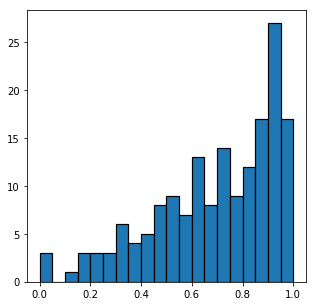

In [55]:
plt.hist(mafft_scores, 20, edgecolor='black', linewidth=1.2)

(array([  3.,   2.,   3.,   3.,   0.,   2.,   4.,   5.,   3.,   9.,   5.,
          5.,   9.,   8.,  14.,  17.,  17.,  15.,  23.,  22.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

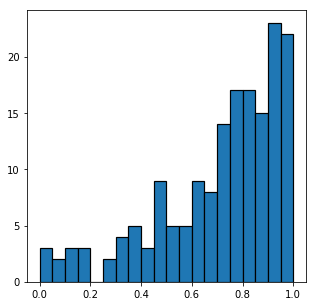

In [56]:
plt.hist(pasta_scores, 20, edgecolor='black', linewidth=1.2)